In [8]:
# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2️⃣ Load Dataset
df = pd.read_csv("english_education.csv")
df.head()

,town11cd,town11nm,population_2011,size_flag,rgn11nm,coastal,coastal_detailed,ttwa11cd,ttwa11nm,ttwa_classification,...,activity_at_age_19_appprenticeships,activity_at_age_19_employment_with_earnings_above_0,activity_at_age_19_employment_with_earnings_above_10_000,activity_at_age_19_out_of_work,highest_level_qualification_achieved_by_age_22_less_than_level_1,highest_level_qualification_achieved_by_age_22_level_1_to_level_2,highest_level_qualification_achieved_by_age_22_level_3_to_level_5,highest_level_qualification_achieved_by_age_22_level_6_or_above,highest_level_qualification_achieved_b_age_22_average_score,education_score
0,E34000007,Carlton in Lindrick BUA,5456.0,Small Towns,East Midlands,Non-coastal,Smaller non-coastal town,E30000291,Worksop and Retford,Majority town and city (small),...,NaN,52.307692,36.923077,NaN,NaN,34.9,39.7,NaN,3.323077,-0.533750
1,E34000016,Dorchester (West Dorset) BUA,19060.0,Small Towns,South West,Non-coastal,Smaller non-coastal town,E30000046,Dorchester and Weymouth,Majority town and city (small),...,10.041841,51.046025,24.686192,4.184100,NaN,21.7,44.6,33.3,3.732218,1.952019
2,E34000020,Ely BUA,19090.0,Small Towns,East of England,Non-coastal,Smaller non-coastal town,E30000186,Cambridge,Majority town and city (Large Towns),...,7.741935,57.419355,27.741935,NaN,NaN,34.4,31.2,32.5,3.548387,-1.044128
3,E34000026,Market Weighton BUA,6429.0,Small Towns,Yorkshire and The Humber,Non-coastal,Smaller non-coastal town,E30000220,Hull,Majority town and city (Large Towns),...,NaN,58.620690,31.034483,NaN,NaN,NaN,66.1,NaN,3.482759,-1.249262
4,E34000027,Downham Market BUA,10884.0,Small Towns,East of England,Non-coastal,Smaller non-coastal town,E30000225,King's Lynn,Majority rural,...,15.053763,55.913978,30.107527,15.053763,NaN,32.6,44.2,NaN,3.161290,-1.169078


In [4]:
# 3️⃣ Rename Columns
df.rename(columns={
    'town11cd': 'town_cd',
    'town11nm': 'town_name',
    'population_2011': 'population',
    'size_flag': 'town_size',
    'rgn11nm': 'region',
    'coastal': 'coastal',
    'coastal_detailed': 'coastal_detail',
    'ttwa11cd': 'ttwa_cd',
    'ttwa11nm': 'ttwa_name',
    'ttwa_classification': 'ttwa_class',
    'job_density_flag': 'job_density',
    'income_flag': 'income_flag',
    'university_flag': 'uni_flag',
    'level4qual_residents35_64_2011': 'level4qual_35_64',
    'ks4_2012_2013_counts': 'ks4_counts',
    'key_stage_2_attainment_school_year_2007_to_2008': 'ks2_2007_08',
    'key_stage_4_attainment_school_year_2012_to_2013': 'ks4_2012_13',
    'level_2_at_age_18': 'level2_age18',
    'level_3_at_age_18': 'level3_age18',
    'activity_at_age_19_full_time_higher_education': 'activity_19_higher_edu',
    'activity_at_age_19_sustained_further_education': 'activity_19_further_edu',
    'activity_at_age_19_appprenticeships': 'activity_19_apprenticeships',
    'activity_at_age_19_employment_with_earnings_above_0': 'activity_19_earnings_0',
    'activity_at_age_19_employment_with_earnings_above_10_000': 'activity_19_earnings_10k',
    'activity_at_age_19_out_of_work': 'activity_19_unemployed',
    'highest_level_qualification_achieved_by_age_22_less_than_level_1': 'qual_lt_level1',
    'highest_level_qualification_achieved_by_age_22_level_1_to_level_2': 'qual_level1_2',
    'highest_level_qualification_achieved_by_age_22_level_3_to_level_5': 'qual_level3_5',
    'highest_level_qualification_achieved_by_age_22_level_6_or_above': 'qual_level6_plus',
    'highest_level_qualification_achieved_b_age_22_average_score': 'avg_qual_score',
    'education_score': 'education_score'
}, inplace=True)


In [5]:
# 4️⃣ Fill Missing Numeric Values
numeric_cols_to_fill = [
    'activity_19_further_edu',
    'activity_19_apprenticeships',
    'activity_19_earnings_10k'
]

for col in numeric_cols_to_fill:
    df[col] = df[col].fillna(df[col].median())


## Dataset Overview

- Columns have been renamed for readability.
- Missing values in key numeric columns have been filled with median values.
- Dataset contains information about education attainment in English towns.


In [6]:
# 5️⃣ Quick Look at Data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   town_cd                      1100 non-null   object 
 1   town_name                    1104 non-null   object 
 2   population                   1100 non-null   float64
 3   town_size                    1104 non-null   object 
 4   region                       1102 non-null   object 
 5   coastal                      1100 non-null   object 
 6   coastal_detail               1100 non-null   object 
 7   ttwa_cd                      1100 non-null   object 
 8   ttwa_name                    1100 non-null   object 
 9   ttwa_class                   1100 non-null   object 
 10  job_density                  1100 non-null   object 
 11  income_flag                  1100 non-null   object 
 12  uni_flag                     1100 non-null   object 
 13  level4qual_35_64  

,town_cd,town_name,population,town_size,region,coastal,coastal_detail,ttwa_cd,ttwa_name,ttwa_class,...,activity_19_apprenticeships,activity_19_earnings_0,activity_19_earnings_10k,activity_19_unemployed,qual_lt_level1,qual_level1_2,qual_level3_5,qual_level6_plus,avg_qual_score,education_score
0,E34000007,Carlton in Lindrick BUA,5456.0,Small Towns,East Midlands,Non-coastal,Smaller non-coastal town,E30000291,Worksop and Retford,Majority town and city (small),...,13.131313,52.307692,36.923077,NaN,NaN,34.9,39.7,NaN,3.323077,-0.533750
1,E34000016,Dorchester (West Dorset) BUA,19060.0,Small Towns,South West,Non-coastal,Smaller non-coastal town,E30000046,Dorchester and Weymouth,Majority town and city (small),...,10.041841,51.046025,24.686192,4.184100,NaN,21.7,44.6,33.3,3.732218,1.952019
2,E34000020,Ely BUA,19090.0,Small Towns,East of England,Non-coastal,Smaller non-coastal town,E30000186,Cambridge,Majority town and city (Large Towns),...,7.741935,57.419355,27.741935,NaN,NaN,34.4,31.2,32.5,3.548387,-1.044128
3,E34000026,Market Weighton BUA,6429.0,Small Towns,Yorkshire and The Humber,Non-coastal,Smaller non-coastal town,E30000220,Hull,Majority town and city (Large Towns),...,13.131313,58.620690,31.034483,NaN,NaN,NaN,66.1,NaN,3.482759,-1.249262
4,E34000027,Downham Market BUA,10884.0,Small Towns,East of England,Non-coastal,Smaller non-coastal town,E30000225,King's Lynn,Majority rural,...,15.053763,55.913978,30.107527,15.053763,NaN,32.6,44.2,NaN,3.161290,-1.169078


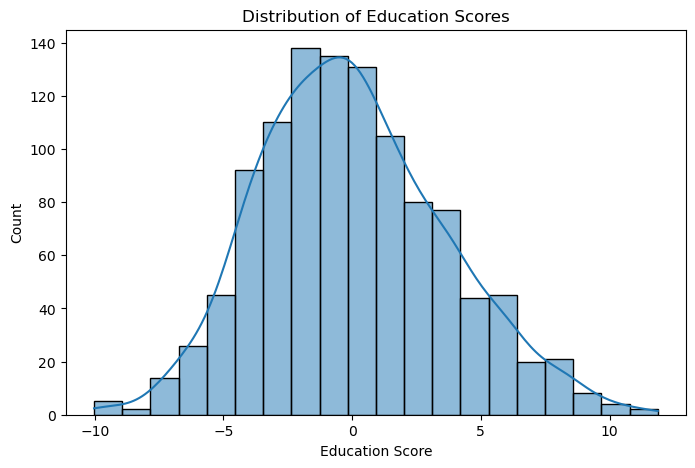

In [7]:
# 6a. Distribution of Education Score
plt.figure(figsize=(8,5))
sns.histplot(df['education_score'], bins=20, kde=True)
plt.title('Distribution of Education Scores')
plt.xlabel('Education Score')
plt.ylabel('Count')
plt.show()


## Distribution of Education Scores

- Most towns have education scores clustered around the mean.
- A few towns perform exceptionally high or low, indicating variation in educational attainment.


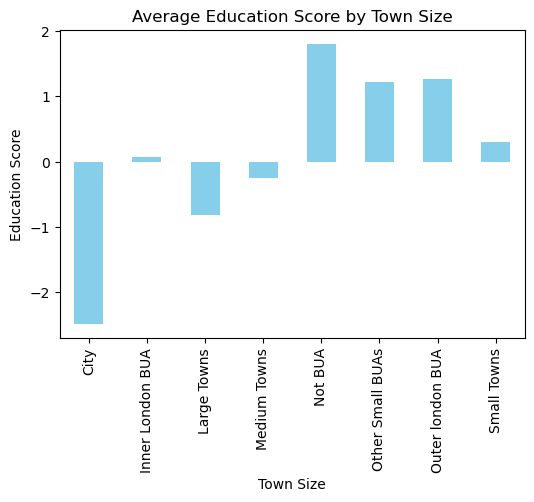

In [15]:
# 6b. Average Education Score by Town Size
plt.figure(figsize=(6,4))
df.groupby('town_size')['education_score'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Education Score by Town Size')
plt.ylabel('Education Score')
plt.xlabel('Town Size')
plt.show()


## Average Education Score by Town Size

- Smaller towns tend to have slightly higher education scores than larger towns.


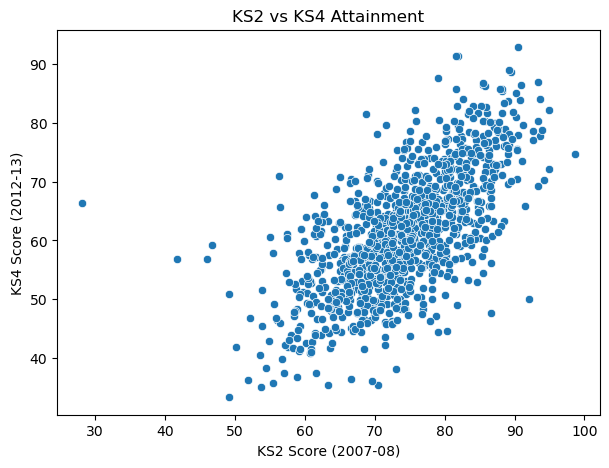

In [16]:
# 6c. KS2 vs KS4 Scatter Plot
plt.figure(figsize=(7,5))
sns.scatterplot(x='ks2_2007_08', y='ks4_2012_13', data=df)
plt.title('KS2 vs KS4 Attainment')
plt.xlabel('KS2 Score (2007-08)')
plt.ylabel('KS4 Score (2012-13)')
plt.show()


## KS2 vs KS4 Attainment

- KS2 and KS4 scores are positively correlated.
- Strong early performance often predicts higher later performance.


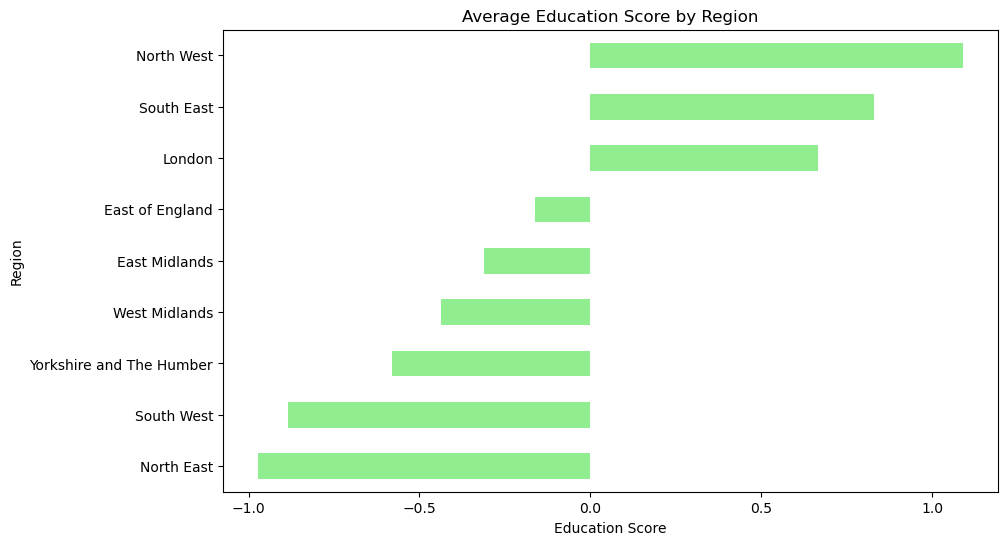

In [17]:
# 6d. Average Education Score by Region
plt.figure(figsize=(10,6))
df.groupby('region')['education_score'].mean().sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average Education Score by Region')
plt.xlabel('Education Score')
plt.ylabel('Region')
plt.show()


## Average Education Score by Region

- Some regions consistently perform better than others.
- Highlights regional differences in educational attainment.


## Insights / Conclusions

- Smaller towns tend to have slightly higher education scores than larger towns.
- KS2 and KS4 scores are correlated; strong early performance often leads to higher later performance.
- Regional differences exist, with some regions consistently outperforming others.
- Cleaning missing values allows for robust analysis of numeric columns.
